## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv',parse_dates=['timestamp'], index_col='timestamp')
df.head()

,user_id,group,landing_page,converted
timestamp,,,,
2017-01-21 22:11:48.556739,851104,control,old_page,0
2017-01-12 08:01:45.159739,804228,control,old_page,0
2017-01-11 16:55:06.154213,661590,treatment,new_page,0
2017-01-08 18:28:03.143765,853541,treatment,new_page,0
2017-01-21 01:52:26.210827,864975,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
num_rows = df.shape[0]
print("The number of rows in the data set is: {}".format(num_rows))

The number of rows in the data set is: 294478


**c.** The number of unique users in the dataset.

In [5]:
unique_user = len(df['user_id'].unique())
print("The number of unique users in the dataset is: {}".format(unique_user))

The number of unique users in the dataset is: 290584


**d.** The proportion of users converted.

In [6]:
pro_con = df.query('converted==True')['user_id'].nunique()/unique_user
print("The proportion of users converted is: {}".format(round(pro_con,4)))

The proportion of users converted is: 0.121


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
df_new_page = df.query('group == "treatment"')
df_new_page = df_new_page.query('landing_page !="new_page"')
df_new_page_1 = df.query('group == "control"')
df_new_page_1 = df_new_page_1.query('landing_page !="old_page"')

print("The number of times the new_page and treatment don't line up is {}".format(len(df_new_page+df_new_page_1)))

The number of times the new_page and treatment don't line up is 3893


**f.** Do any of the rows have missing values?

In [8]:
print("The data frame doesn't contain any NaN values.")
df.isna().sum()

The data frame doesn't contain any NaN values.


user_id         0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [87]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df[(df['group']=="treatment") & (df['landing_page']=="old_page")].index,axis=0)
df2 = df2.drop(df2[(df2['group']=="control") & (df2['landing_page']=="new_page")].index,axis=0)

In [88]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2**

**a.** How many unique **user_id**s are in **df2**?

In [11]:
num_unq_user_id = df2['user_id'].unique()
print("Number of unique user_ids are : {}".format(len(num_unq_user_id)))

Number of unique user_ids are : 290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
dup_id = df2[df2.duplicated()]

**c.** Display the rows for the duplicate **user_id**? 

In [15]:
dup_id

,user_id,group,landing_page,converted
timestamp,,,,
2017-01-14 02:55:59.590927,773192,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [16]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

# Check again if the row with a duplicate user_id is deleted or not
df2 = df2.drop(dup_id.index,axis=0)

`4.` Use **df2**

a. What is the probability of an individual converting regardless of the page they receive?

In [89]:
conv_prob = len(df2.query('converted==True'))/len(df2)
print("The probability of an individual converting regardless of the page they receive: {}".format(round(conv_prob,4)))

The probability of an individual converting regardless of the page they receive: 0.1196


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [90]:
control_conv_prob = len(df2.query('group=="control" & converted==True'))/len(df2.query('group=="control"'))
print("Given that an individual was in the `control` group the probability they converted is: {}".format(round(control_conv_prob,4)))

Given that an individual was in the `control` group the probability they converted is: 0.1204


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treat_conv_prob = len(df2.query('group=="treatment" & converted==True'))/len(df2.query('group=="treatment"'))
print("Given that an individual was in the treatment group the probability they converted is: {}".format(round(treat_conv_prob,4)))

Given that an individual was in the treatment group the probability they converted is: 0.1188


In [91]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treat_conv_prob - control_conv_prob
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [92]:
prob_recv_new_page = len(df2.query('landing_page == "new_page"'))/len(df2)
print("the probability that an individual received the new page is: {}".format(round(prob_recv_new_page,4)))

the probability that an individual received the new page is: 0.5001


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**The Data Shown here indicates that old page bring more number of conversion than new page but as per Simpson's Paradox it's better idea to do further tests to confirm the Null hypothesis**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<h2><center><strong>$H_0 : p_{new} \leq p_{old}$</strong></center></h2>

<h2><center><strong>$H_1 : p_{new} > p_{old}$</strong></center></h2>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.<br><br>

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [23]:
P_new = conv_prob
print("Converted success rate for new page is : {}".format(round(P_new,5)))

Converted success rate for new page is : 0.1196


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [24]:
P_old = conv_prob
print("Converted success rate for old page is : {}".format(round(P_old,5)))

Converted success rate for old page is : 0.1196


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [25]:
n_new = len(df2.query('landing_page=="new_page"'))
print("Number of new_page visit : {}".format(n_new))

Number of new_page visit : 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old = len(df2.query('landing_page=="old_page"'))
print("Number of new_page visit : {}".format(n_old))

Number of new_page visit : 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [30]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-P_new, P_new])
round(new_page_converted.mean(),6)

0.119978

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [31]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-P_old, P_old])
round(old_page_converted.mean(),6)

0.120758

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [55]:
sample_mean_diffs = new_page_converted.mean() - old_page_converted.mean()
round(sample_mean_diffs, 6)

-0.00077999999999999999


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [56]:
# Sampling distribution 
p_diffs = []

for _ in range(10000):
    boot_sample_new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-P_new, P_new])
    boot_sample_old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-P_old, P_old])
    p_diffs.append(boot_sample_new_page_converted.mean() - boot_sample_old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

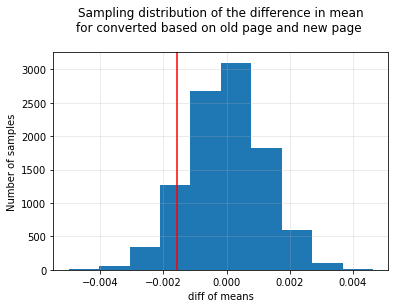

In [93]:
plt.hist(p_diffs)
plt.axvline(obs_diff,color='red')
plt.title("Sampling distribution of the difference in mean"+"\n"+"for converted based on old page and new page \n")
plt.xlabel("diff of means")
plt.ylabel("Number of samples")
plt.grid(True, alpha=0.3)

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [94]:
p_diffs = np.array(p_diffs)
print("P-Value for Null Hypothesis is: {0:0.6}".format((p_diffs > obs_diff).mean()))

P-Value for Null Hypothesis is: 0.9041


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

>**We computed the probability of observing the statistic for Null Hypothesis being TRUE and it's called P-Value. It looks like that Alternative Hypothesis brings less success rate because the P-Value is high for Null Hypothesis being True. So we can say that NULL Hypothesis is correct while the $P-Value \geq \alpha$ i.e, Type 1 error of 5%.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [95]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('landing_page=="old_page" & converted==True'))

# number of conversions with the new_page
convert_new = len(df2.query('landing_page=="new_page" & converted==True'))

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page=="old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page=="new_page"'))

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [96]:
import statsmodels.api as sm
count_array = np.array([convert_new, convert_old])
nobs_array = np.array([n_new, n_old])
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='larger')
print('P-Value is {0:0.4}'.format(p_value))
print('Z-Score is {0:0.4}'.format(z_score))

P-Value is 0.9052
Z-Score is -1.312


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**The P-Value from the sampling distribution and proportions_ztest are almost same and large which proivde sufficent base to make the decision that old page brings more conversion over the new page. The very large P-Value also provide sufficent avidance that we don't need to carry any further test with respect to the control and experiment group. Hence we can stop the test.**

> **The Z-Score is $-1.312$ which is very low compare to the $-0.0015782$ observed difference from dataframe df1 and it lies on the left hand side of the histogram plot hence we can say that NULL Hypothesis is correct**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>**As "converted, group, landing_page" DataFrame columns contain categorical data type we need to opt for Logistic Regression method which provide the output as true or false.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [71]:
df2['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.drop(['control'],axis=1,inplace=True)
df2.head()

,user_id,group,landing_page,converted,intercept,ab_page
timestamp,,,,,,
2017-01-21 22:11:48.556739,851104,control,old_page,0,1,0
2017-01-12 08:01:45.159739,804228,control,old_page,0,1,0
2017-01-11 16:55:06.154213,661590,treatment,new_page,0,1,1
2017-01-08 18:28:03.143765,853541,treatment,new_page,0,1,1
2017-01-21 01:52:26.210827,864975,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [73]:
import statsmodels.api as sm
log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [74]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-10 00:07 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

>**Null and Alternative Hypothesis in A/B Test is two-sided were as Null and Alternative Hypothesis in regression approach is one-sided. P-value in regression approach suggest whether considering a explainatory variable is significant or not. The lower value of P (i.e, Reject the Null Hypothesis $\beta = 0$) suggest it's significant to consider that coefficient and vice-verca. P-Value for ab_page is 0.1899 ($ P_{value} > \alpha$ i.e, don't reject the Null Hypothesis) which suggest that new_page or treatment group is statistically not significant hence following test also proves that Null Hypothesis from Test A/B is TRUE. Old page is more effective than new page to get conversion.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**It's better to consider the explainatory variable which are related to the response parameter. Having more factor may or may not be helpful. If factors are linearly dependent (Multicolinearity) on each other than it may cause full rank matrix problem and one can use co-related scatter plots and VIF to check if factors are linearly dependent on one another and respectively remove the explainatory variable (depending upon the requirement) with VIF more than 10.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns.

 Provide the statistical output as well as a written response to answer this question.

In [75]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')

In [77]:
# Join with the df2 dataframe
df_merged = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [78]:
# Create the necessary dummy variables
df_merged[['UK','US','CA']] = pd.get_dummies(df_merged['country'])

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results.

In [84]:
# Fit your model, and summarize the results
log_mod_2 = sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','UK','CA']])
result = log_mod_2.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-10 00:27 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
CA           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
==================================================================

"""

In [82]:
np.exp(-1.9794), np.exp(-0.0149), np.exp(-0.0506), np.exp(-0.0099)

(0.13815210371071329,
 0.9852104557227469,
 0.95065885803307082,
 0.99014884368295719)

In [85]:
1/np.exp(-1.9794), 1/np.exp(-0.0149), 1/np.exp(-0.0506), 1/np.exp(-0.0099)

(7.2383986428029541, 1.0150115583846535, 1.0519020483004984, 1.009949167117542)

>**We are considering "Control group (i.e Old page) and US" as base line to compare. Higher P-Value states that Null Hypothesis is True (i.e, $\beta = 0$) and it's indicate that particular explainatory variable is not required. In our case It turns out that treatment group (new_page), Countries such as UK, CA are doesn't infulence the conversion rate because the P-Value is more than 0.05. So we can neglect all this explainatory variables in the logistic regression model**

> - **for every one unit increase old page the Conversion is 1.0519 times as likely in UK than US holding all else constant.**
- **for every one unit increase old page the Conversion is 1.0099 times as likely in CA than US holding all else constant.**
- **for every one new page the conversion is 0.13815 times as likely as old page holding all else constant.**

In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

## Summary: 

>1. **After conducting the simple probability test we found out that "Old Landing Page" will bring more success than "New Landing Page". However As per Simpsons Paradox it can be wrong because the statistic may change if we consider the other variables.** 
2. **To get further insight we perform the A/B Testing. A/B Test also shows that "Old Landing Page" brings more success which was our NULL Hypothesis with P-Value of 0.9041.**
3. **Finally to confirm the A/B Test prediction we conducted Logistic Regression because we had multiple independent variables and few of the independent variables were categorical data types and logistic regression showed that page success is not much depends on Countries and New Landing Page.**